In [13]:
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
df = pd.read_csv('customer_acquisition_data.csv')


In [15]:
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [20]:
df.shape

(800, 5)

In [21]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [22]:
df.drop_duplicates()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [23]:
df.nunique()

customer_id        800
channel              4
cost                 4
conversion_rate      4
revenue            722
dtype: int64

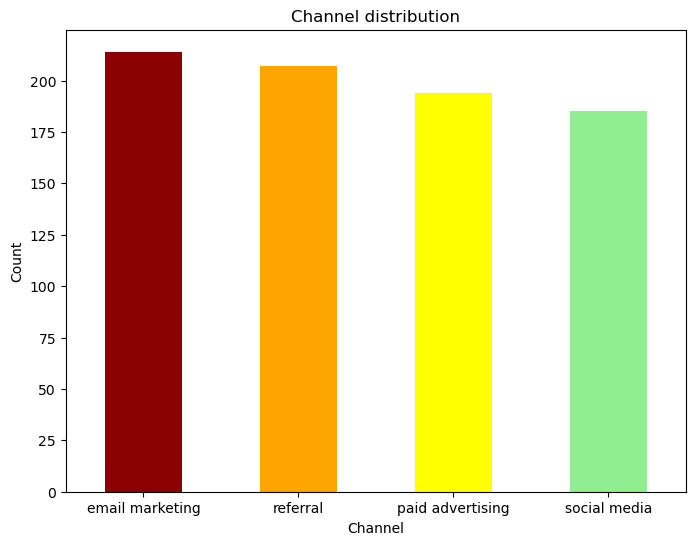

<Figure size 640x480 with 0 Axes>

In [24]:
pop_chan = df['channel'].value_counts().sort_values(ascending = False)
plt.figure(figsize = (8, 6))
pop_chan.plot(kind = 'bar', color = ['darkred', 'orange', 'yellow', 'lightgreen'])
plt.title('Channel distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()
plt.savefig('channel popularity')

In [25]:
tot_chan_cost = df.groupby('channel')['cost'].sum()
tot_chan_cost

channel
email marketing     1122.700340
paid advertising    5907.363479
referral            1722.307634
social media        1766.070249
Name: cost, dtype: float64

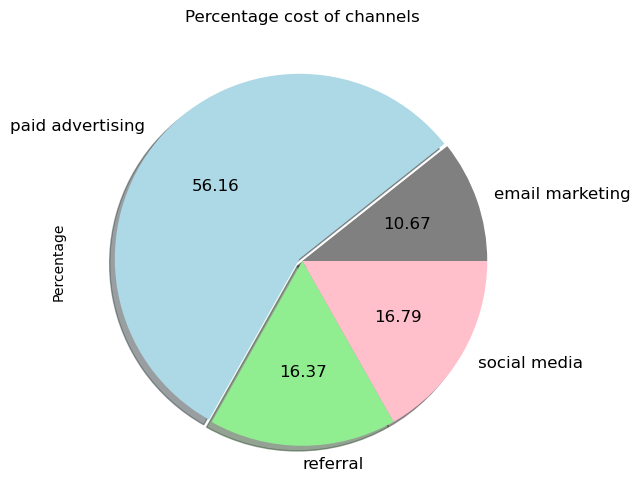

<Figure size 640x480 with 0 Axes>

In [26]:
tot_chan_cost = df.groupby('channel')['cost'].sum()
tot_chan_cost
plt.figure(figsize = (8, 6))
tot_chan_cost.plot.pie(subplots=True, autopct = '%1.2f', explode =[0,0.02,0,0], colors =['gray', 'lightblue', 'lightgreen', 'pink'], shadow = True, fontsize = 12)
plt.title('Percentage cost of channels')
plt.ylabel('Percentage')
plt.show()
plt.savefig('percentage cost of channels pie plot')

In [27]:
tot_chan_revenue = df.groupby('channel')['revenue'].sum()
tot_chan_revenue

channel
email marketing     604706
paid advertising    548396
referral            569552
social media        492667
Name: revenue, dtype: int64

<Axes: >

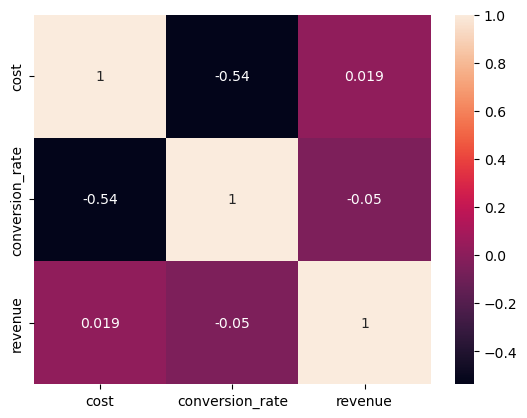

In [30]:
# checking the correlation of cost, conversion_rate, revenue
correlation = df[['cost', 'conversion_rate', 'revenue']].corr()
sns.heatmap(data = correlation, annot = True)

In [31]:
df['roi'] = (df['revenue'] - df['cost']) / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


<Axes: xlabel='channel', ylabel='roi'>

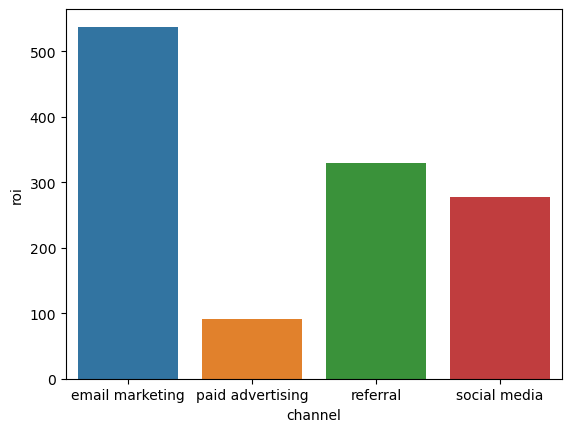

In [32]:
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi')

In [33]:
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


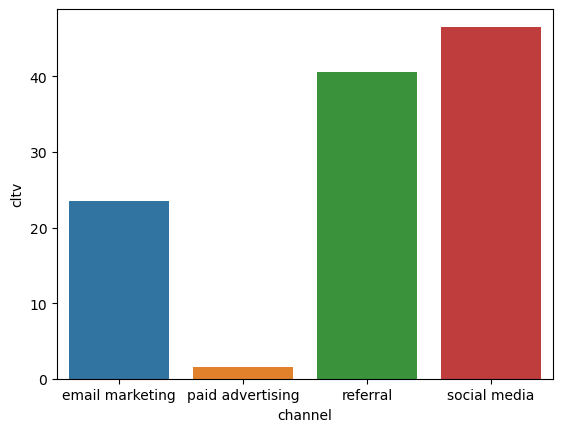

In [34]:
cltv_by_channel = df.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv');

F:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



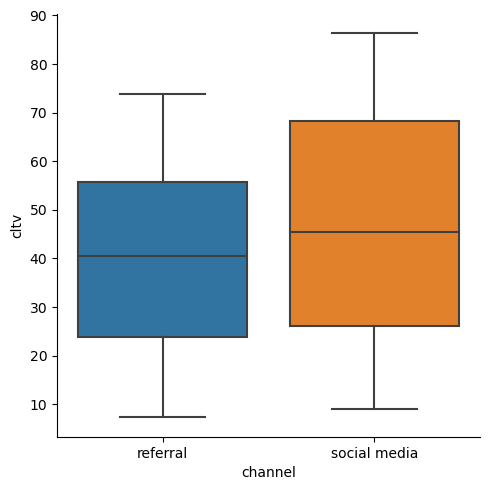

In [35]:
select = df[df['channel'].isin(['referral', 'social media'])]

sns.catplot(select, x='channel', y='cltv', kind='box');